# Flux, magnitudes, colors, and color-magnitude diagrams IRL (sort of)

I have put together some filter curves (from the SDSS) and a basic function to plot blackbody intensity ($I_{\lambda}$) versus wavelength for blackbody emitters (stars).

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
import seaborn as sns
from astropy.io import fits
%matplotlib inline

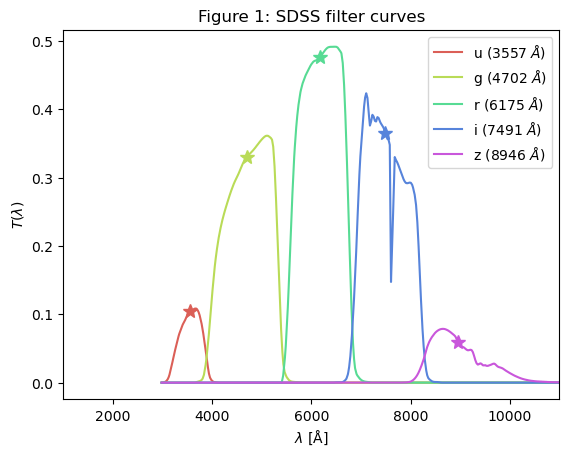

In [5]:
# SDSS standard filter transmission curves
# http://filters.apo.nmsu.edu/curves/SDSS/
sdss_filter_names = ['u','g','r','i','z']

# effective wavelengths for each filter
sdss_pivot_wavelengths = [3557, 4702, 6175, 7491, 8946]

colors = sns.color_palette("hls", 5)

lines = []
for filter_name,color,piv in zip(sdss_filter_names,colors,sdss_pivot_wavelengths):
    t = np.genfromtxt('sdss_filters/'+filter_name+'.txt',names=True,dtype=None)
    plt.plot(t['l'], t['T'],label=(filter_name+' ({0} $\AA$)'.format(piv)),color=color)
    plt.plot([piv],[t['T'][np.argmin(np.abs(t['l']-piv))]],'*',color=color,ms=10)
plt.xlim([1000,11000])
plt.legend()
plt.xlabel(r'$\lambda~[\rm \AA]$')
plt.ylabel(r'$T(\lambda)$')
plt.title('Figure 1: SDSS filter curves')
plt.show()

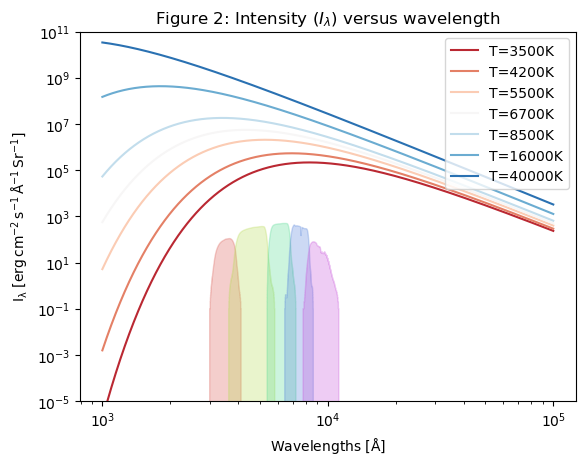

In [ ]:
# blackbody intensity function
h = 6.6261*10**(-27)  # cm^2 g / s
c = 2.99792*10**(10)  # cm / s
k = 1.3806*10**(-16)  # erg / K

def planck(wav, T):
    """
    blackbody intensity function
    
    Parameters
    ----------
    wav : array_like
        array of wavelengths in units of cm
    
    T : float
        blackbody temperature in units of kelvin
    """
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    # in units erg cm^{-2} s^{-1} cm^{-1} Sr^{-1}    
    intensity = a/((wav**5)*(np.exp(b)-1.0))
    
    intensity = intensity*1e-8
    # in units erg cm^{-2} s^{-1} \AA^{-1} Sr^{-1}
    return intensity

temps = [3500, 4200, 5500, 6700, 8500, 16000, 40000]  # Kelvin
colors = sns.color_palette("RdBu_r",len(temps))[::-1]
wav = np.arange(1000, 100000, 1)  # Angstroms

fig = plt.figure()
for T,color in zip(temps,colors):
    wav_in_cm = wav*1e-8
    bb = planck(wav_in_cm, T)
    plt.plot(wav, bb,color=color,label='T={0}K'.format(T))
plt.title('Figure 2: Intensity ($I_{\lambda}$) versus wavelength')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelengths [$\mathrm{\AA}$]')
plt.ylabel('$\mathrm{ I_{\lambda}}$ [$\mathrm{erg\,cm^{-2}\,s^{-1}\,\AA^{-1}\,Sr^{-1}}$]')

sdss_filter_names = ['u','g','r','i','z']

filtcolors = sns.color_palette("hls", len(sdss_filter_names))

for filter_name,color in zip(sdss_filter_names,filtcolors):
    t = np.genfromtxt('sdss_filters/'+filter_name+'.txt',names=True,dtype=None)
    plt.fill_between(t['l'], np.zeros_like(t['l']), t['T']*1e3,\
                     label=filter_name,color=color,alpha=0.3)

plt.ylim(1e-5,1e11)
plt.show()

A note about flux versus intensity: Although blackbody radiation is isotropic, flux coming from the surface of the star will leave in a net parallel direction to a small portion of the surface (see Figure 2.2 in the textbook), so the flux that escapes the surface of the star is $F = \pi I$.

(1000.0, 100000000000.0)

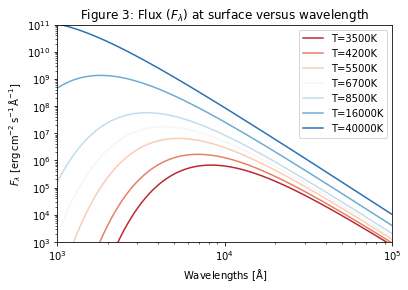

In [4]:
temps = [3500,4200,5500,6700,8500,16000,40000]
colors = sns.color_palette("RdBu_r",len(temps))[::-1]

### notice the extra factor of pi!! (figure 2.2, equation 2.5)
fig = plt.figure()
for T,color in zip(temps,colors):
    wav_in_cm = wav*1e-8
    bb = planck(wav_in_cm, T)*np.pi
    plt.plot(wav, bb,color=color,label='T={0}K'.format(T))
plt.title('Figure 3: Flux ($F_{\lambda}$) at surface versus wavelength')
plt.legend(loc='upper right')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavelengths [$\mathrm{\AA}$]')
plt.ylabel('${F_{\lambda}}$ [$\mathrm{erg\,cm^{-2}\,s^{-1}\,\AA^{-1}}$]')
plt.xlim(1000,1e5)
plt.ylim(1e3,1e11)

1) Now recreate the intensity plot (or $F_{\mathrm{\lambda,surface}}$) as a $F_{\lambda}$ versus wavelength that one would observe on Earth assuming $R_{*}=R_{\odot}$ and $d_{Earth-Star}=10$ parsecs.

In [7]:
scale = 5.083266875016086e-18  # (R_sun / 10 pc)^2 in cgs
for T, color in zip(temps, colors):
    bb_I = planck(wav*1e-8, T)                 # I_lambda [erg cm^-2 s^-1 Å^-1 sr^-1]
    F_lambda_earth = math.pi * bb_I * scale    # F_lambda at Earth [erg cm^-2 s^-1 Å^-1]
    plt.plot(wav, F_lambda_earth, color=color, label=f"T={T}K")
plt.xscale('log'); plt.yscale('log')
plt.xlabel(r"Wavelength [$\AA$]"); plt.ylabel(r"$F_\lambda$ [erg cm$^{-2}$ s$^{-1}$ $\AA^{-1}$]")
plt.title(r"$F_\lambda$ at Earth ($R_\star=R_\odot$, $d=10$ pc)"); plt.legend(); plt.show()

NameError: name 'math' is not defined

2) Now, calculate the total flux that would be observed from this star assuming $T_{eff}=5500k$ through each filter in $erg\,cm^{-2}\,s^{-1}\,Angstrom^{-1}$. Add these fluxes to your $f_{\lambda}(\lambda)$ plot by including the broadband fluxes at the pivot wavelengths.

Reminder: $f_{\lambda,X} = \int_0^\infty f_{\lambda}(\lambda) F_X(\lambda) R(\lambda) T(\lambda) d\lambda$

For this you may assume that $R(\lambda)$ and $T(\lambda)$ are ideal ($\approx 1$)

However, ultimately people usually characterize the flux density in a given filter as the /average/ flux density (to convert to a magnitude).

$\langle f_{\lambda,X}\rangle = \frac{\int_0^\infty f_{\lambda}(\lambda) F_X(\lambda) R(\lambda) T(\lambda) \lambda d\lambda}{\int_0^\infty F_X(\lambda) R(\lambda) T(\lambda) \lambda d\lambda}$

which in this case turns into:

$\langle f_{\lambda,X}\rangle = \frac{\int_0^\infty f_{\lambda}(\lambda) F_X(\lambda) \lambda d\lambda}{\int_0^\infty F_X(\lambda) \lambda d\lambda}$


Hint: You will have to solve this integral numerically, approximating the integral as a sum: $\int_0^\infty f_{\lambda}(\lambda) F_X(\lambda) \lambda d\lambda \approx \Sigma_{\lambda_i=\lambda_{min}}^{\lambda_{max}} f_{\lambda}(\lambda_i) F_X(\lambda_i) \lambda d\lambda$

Hint 2: make sure that your $\lambda_i$ grid is the same for the blackbody curve and the transmission curves!

3) Now you will calculate the magnitudes in the AB system:

$m_{AB} \equiv -2.5 \log_{10} f_{\nu} - 48.60$ (if $f_{\nu} [erg\,s^{-1}\,cm^{-2}\,Hz^{-1}]$)

(a) You'll notice that your current fluxes are in $f_{\lambda}$, so the first step is to convert to $f_{\nu}$. Please assume that the fluxes are measured at the pivot wavelengths.

(b) And _then_ you will calculate the AB magnitudes.

4) Repeat for all temperatures and plot $T_{eff}$ versus $(g-r)$ color. What can you conclude about the sensitivity of optical filters to effective temperatures of all stars? Hint: what would happen if stars got even hotter ($T_{eff}>40,000K$)?

Bonus: If you have extra time, you can check your calculations for Proxima centauri, the closest star (1.3 parsecs away). Proxima centauri has a $m_{G,AB}\sim8.9$ and an effective temperature of $T_{\mathrm{eff}}\sim3000K$ (yes, this *is* a slightly different filter, so you won't get exactly the correct answer, but you should get close).

This is an excellent example of a situation in which having a set of functions defined could be very useful when performing repetitive operations.